<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="50" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** <span style="color:NAVY"> Andrés Lares Barragán</span>

**Fecha:** 17 de febrero del 2021.  

**Expediente** : <span style="color:NAVY"> 724055 </span>  
    
**Profesor:** Oscar David Jaramillo Zuluaga.

<span style="color:NAVY"> Estudiante 1</span>

# Tarea 5: Clase 9
    
### [Link a repositorio GitHub](https://github.com/AndresLaresBarragan/Tarea5_ALares)
   

> Para las siguiente dos funciones, genere muestras aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.


In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

## Pregunta 1
> Generación variable aleatoria **continua**
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

<span style="color:NAVY"> 1. Conociendo la distribución de probabilidad acumulada (CDF), el método de la transformada inversa implica igualar $F(x)$ a una variable aleatoria con distribución uniforme $U$.   
2. Posteriormente, se despeja $x$ para encontrar la función $F^{-1}(U)$ que genera valores aleatorios de $x$ con distribución de probabilidad (PDF) $f(x)$. </span>

#### <span style="color:NAVY"> Transformada Inversa
$$F^{-1}(U) = \sin^2{\frac{\pi U}{2}} \quad \small{U \rightarrow \text{V.A.} \sim \text{uniforme(0,1)}}$$

$$F^{-1}(U) = \frac{1-\cos{\pi U}}{2}$$
</span>

In [2]:
def T_inv(N):
    '''
    Genera muestras aleatorias con dist f(x)
    de acuerdo al metodo de la transformada inversa.
    '''
    return (1-np.cos(np.pi*np.random.random(N)))/2

#### <span style="color:NAVY">Comprobación   
El histograma de los valores generados debe ser acostado por la PDF $f(x)$.  
$$f(x) = \frac{dF}{dx} = \frac{1}{\pi \sqrt{x} \sqrt{1-x}} $$
</span>

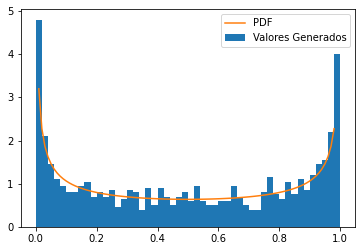

In [3]:
# Comprobar histograma de valores generados vs. funcion PDF
N = 1000 
continuos = T_inv(N)

x = np.arange(0.01, .99, 0.01) # valores desde 0.01 hasta 0.99 para evitar dividir entre cero.
f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))

plt.hist(continuos, bins = 50, density = True, label = 'Valores Generados')
plt.plot(x,f(x),label='PDF')
plt.legend()
plt.show()

## Pregunta 2

> Generación variable aleatoria **discreta**
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

<span style="color:NAVY"> 
$$\text{PMF: }\quad P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n $$ 
    
    
$$\text{CDF: }\quad \operatorname {P} (X\leq x) = \sum _{x_{i}\leq x}p(x_{i})$$  
    El primer paso es calcular y acomodar en un dataframe los valores de 'p' y 'p_acum' para cada valor de 'x'. </span>
</span>

### <span style="color:NAVY"> Usando la PMF del problema:  

In [4]:
from math import factorial as fac

In [5]:
n, p = 10, .7
prob_ocur1 =  [(fac(n)/(fac(i)*fac(n-i)))*p**i*(1-p)**(n-i) for i in range(n+1)]
prob_ocur1

[5.9049000000000085e-06,
 0.00013778100000000018,
 0.0014467005000000015,
 0.009001692000000007,
 0.03675690900000003,
 0.10291934520000003,
 0.20012094900000005,
 0.266827932,
 0.23347444049999994,
 0.12106082099999996,
 0.02824752489999998]

### <span style="color:NAVY"> Acomodar en DataFrame

In [6]:
datos = pd.DataFrame(index = range(0,n+1), data = prob_ocur1, columns = ['$$P(X=i)$$'] ).rename_axis(index='$$X_i$$')
datos['$$\operatorname {P} (X\leq x) $$'] = np.cumsum(prob_ocur1)
datos

,$$P(X=i)$$,$$\operatorname {P} (X\leq x) $$
$$X_i$$,,
0,0.000006,0.000006
1,0.000138,0.000144
2,0.001447,0.001590
3,0.009002,0.010592
4,0.036757,0.047349
5,0.102919,0.150268
6,0.200121,0.350389
7,0.266828,0.617217
8,0.233474,0.850692


<span style="color:NAVY"> El MTI para variables aleatorias discretas se reduce a:  
    1. Generar un número uniforme $U$ entre (0,1).  
    2. Encontrar $k\in\{1,\cdots,n\}$ tal que $q_{k-1}<U\leq q_k$  
    3. Tomar $X=c_k$.  
Donde $q_i$ es la probabilidad acumulada que corresponde a $x_i$.
</span>

In [7]:
# ** sum([1 for p in data.iloc[:,1] if p < U]): retorna el valor c_k debido a que los valores empiezan en cero, el MTI requiere c_k
def MTI_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                indices: 'valores reales a generar aleatoriamente',
                N: 'cantidad de números aleatorios a generar'):
    '''
    Retorna 'N' valores aleatorios de 'x' que pertenece a 'indices' de acuerdo a
    la distribucion de 'p_acum'.
    '''
    U =np.random.rand(N)
    # * No es necesario definir un diccionario que transforme de c_(k-1) a c_k.    # **
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U])

    return y


### <span style="color:NAVY"> Histograma (valores PMF del problema)

In [8]:
Fx1 = datos.iloc[:,1]
valores1 = datos.index

discretos1 = MTI_discreta(Fx1,valores1,N)

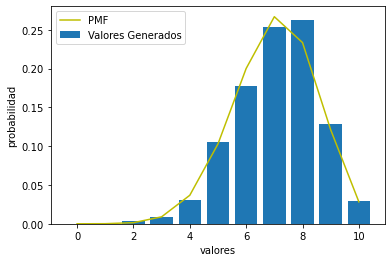

In [9]:
# graficar usando np.histogram() | agregar el parametro 'range' para que tome en cuenta los valores de x que no fueron generados.
y1, bins1 = np.histogram(discretos1, bins = len(set(valores1)), density = True, range= (0,len(set(valores1))))


PMF = datos.iloc[:,0] # PMF debe acotar el histograma

plt.bar(bins1[:-1], y1, label = 'Valores Generados')
plt.plot(PMF , label = 'PMF', color = 'y' )
plt.xlabel('valores')
plt.ylabel('probabilidad')
plt.legend()
plt.show()

#### <span style="color:NAVY"> CONCLUSIÓN: En ambos ejercicios de esta tarea, la varianza (diferencia entre prob empÍrica y prob teórica para cada valor de $x_i$) es alta debido a la baja cantidad de valores aleatorios generados. En caso de que no se pueda aumentar el número de V.A., se debe implementar una técnica de reducción de varianza para mejorar la precisión con la cual se generan los V.A.